<a href="https://colab.research.google.com/github/kwanqing/CMPE-257-Fall23-Jeffrey-Ong/blob/homework-1/Synthetic_Data_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# ## Generates N random points for a given linear separator w
# ## if wTx > 0, y = 1; if wTx < 0, y = -1. wTx = 0 are discarded
# def generate_pla(N=20,w0=0,w1=1,w2=1):
#     n = 0
#     X1 = []
#     X2 = []
#     Y = []
#     while(n < N):
#         x1 = random.uniform(-10,10)
#         x2 = random.uniform(-10,10)
#         y_step = w0 + w1*x1 + w2*x2
#         if(y_step == 0):
#             continue
#         X1.append(x1)
#         X2.append(x2)
#         if(y_step > 0):
#             Y.append(1)
#         elif(y_step < 0):
#             Y.append(-1)
#         n += 1
#     data = [np.array([1,X1[i],X2[i],Y[i]]) for i in range(N)]
#     return data

In [ ]:
# def generate_data(N, w0, w1, w2):
#     data = []
#     for _ in range(N):
#         x1 = random.uniform(-10, 10)
#         x2 = random.uniform(-10, 10)
#         y = w0 + w1 * x1 + w2 * x2
#         label = 1 if y > 0 else -1
#         data.append((np.array([1, x1, x2]), label))
#     return data

In [ ]:
# f_w0, f_w1, f_w2 = 1, 1, 1
# N = 50
# data = generate_pla(N, f_w0, f_w1, f_w2)

In [ ]:
# def abline(slope, intercept):
#     """Plot a line from slope and intercept"""
#     axes = plt.gca()
#     x_vals = np.array(axes.get_xlim())
#     y_vals = intercept + slope * x_vals
#     plt.plot(x_vals, y_vals, '--', label = "x_2="+str(slope)+"x_1+"+str(intercept) )

In [ ]:
# import pandas as pd

# df = pd.DataFrame(data)
# df.drop([0], axis = 1, inplace=True)
# df.columns = ['x1', 'x2', 'y']


In [ ]:
# df.info()

In [ ]:
# df.to_csv('synthetic_dataset.csv', index=False)

In [2]:
# reference from code given above
def generate_pla(N=20, w0=0, w1=1, w2=1):
    n = 0
    data = []
    while n < N:
        x1 = random.uniform(-10, 10)
        x2 = random.uniform(-10, 10)
        y_step = w0 + w1 * x1 + w2 * x2
        if y_step == 0:
            continue
        y = 1 if y_step > 0 else -1
        data.append((np.array([1, x1, x2]), y))
        n += 1
    return data

In [3]:
# reference from code given above
def abline(slope, intercept, label=None):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label=label)

In [4]:
def modified_pla(train_data, n, max_iter=1000):
    w = np.zeros(3)
    iterations = 0
    for _ in range(max_iter):
        x, y = random.choice(train_data)
        s = np.dot(w, x)
        if y * s <= 1:
            w += n * (y - s) * x
            iterations += 1
    return w

In [5]:
def test_error(test_data, w):
    errors = 0
    for x, y in test_data:
        s = np.dot(w, x)
        if np.sign(s) != y:
            errors += 1
    return errors / len(test_data)

In [6]:
def plot_data(train_data, w, target_w, n):
    for x, y in train_data:
        if y == 1:
            plt.scatter(x[1], x[2], color='r')
        else:
            plt.scatter(x[1], x[2], color='b')
    abline(-w[1]/w[2], -w[0]/w[2], label='Hypothesis g')
    abline(-target_w[1]/target_w[2], -target_w[0]/target_w[2], label='Target function f')

    plt.title(f"Training Data, Target Function f, and Hypothesis g with n = {n}")
    plt.legend()
    plt.show()

In [19]:
train_data = generate_pla(100, w0=1, w1=1, w2=1)
test_data = generate_pla(10000, w0=1, w1=1, w2=1)
df = pd.DataFrame(train_data)
df.columns = ['x', 'y']
x = df["x"].tolist()
y = df["y"]
df_new = pd.DataFrame(x)
df_latest = df_new.join(y)
# df.drop([0], axis = 1, inplace=True)
df_latest.columns = ['x0', 'x1', 'x2', 'y']

In [20]:
df_latest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      100 non-null    float64
 1   x1      100 non-null    float64
 2   x2      100 non-null    float64
 3   y       100 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 3.2 KB


In [21]:
df_latest.to_csv('synthetic_dataset.csv', index=False)
df_latest

,x0,x1,x2,y
0,1.0,6.221889,2.405761,1
1,1.0,4.959562,-0.817626,1
2,1.0,2.978907,6.599107,1
3,1.0,5.071573,7.012729,1
4,1.0,0.361172,2.602867,1
...,...,...,...,...
95,1.0,-2.506513,7.186262,1
96,1.0,-8.516347,-7.866431,-1
97,1.0,0.098786,-0.700784,1
98,1.0,-6.101590,-0.374608,-1


<ipython-input-4-afa43f62db00>:8: RuntimeWarning: overflow encountered in double_scalars
  w += n * (y - s) * x
<ipython-input-4-afa43f62db00>:8: RuntimeWarning: invalid value encountered in add
  w += n * (y - s) * x


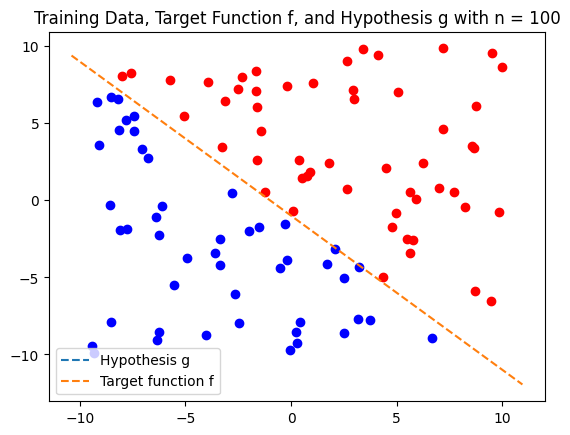

Test error: 1.0


In [37]:
# Task 3 (a)
w = modified_pla(train_data, n=100)

target_w = np.array([1, 1, 1])
plot_data(train_data, w, target_w, n=100)

error = test_error(test_data, w)
print("Test error:", error)

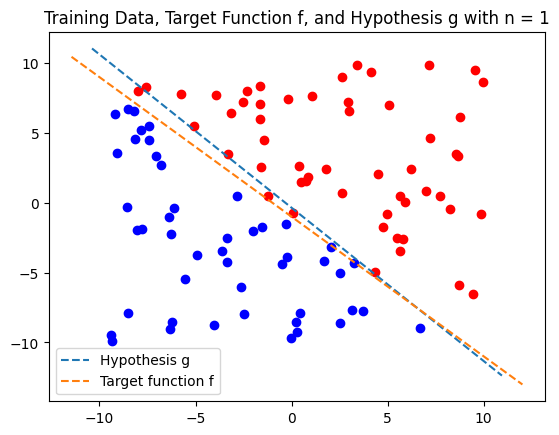

Test error: 0.0343


In [28]:
# Task 3 (b)
#train_data = generate_pla(100, w0=1, w1=1, w2=1)
#test_data = generate_pla(10000, w0=1, w1=1, w2=1)
w = modified_pla(train_data, n=1)

target_w = np.array([1, 1, 1])
plot_data(train_data, w, target_w, n=1)

error = test_error(test_data, w)
print("Test error:", error)

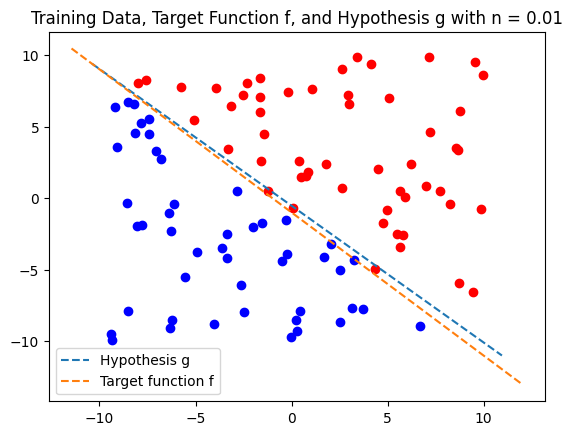

Test error: 0.0237


In [35]:
# Task 3 (c)
#train_data = generate_pla(100, w0=1, w1=1, w2=1)
#test_data = generate_pla(10000, w0=1, w1=1, w2=1)
w = modified_pla(train_data, n=0.01)

target_w = np.array([1, 1, 1])
plot_data(train_data, w, target_w, n=0.01)

error = test_error(test_data, w)
print("Test error:", error)

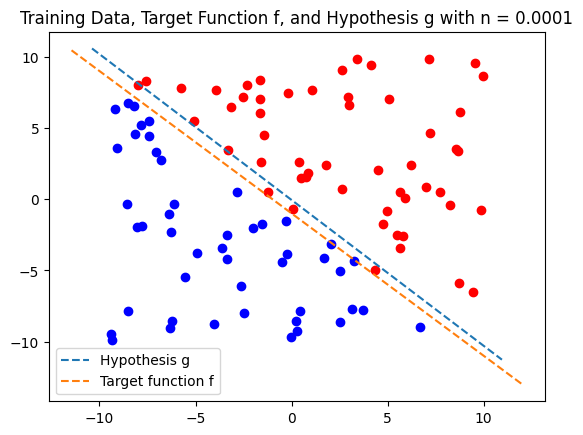

Test error: 0.0473


In [36]:
# Task 3 (d)
#train_data = generate_pla(100, w0=1, w1=1, w2=1)
#test_data = generate_pla(10000, w0=1, w1=1, w2=1)
w = modified_pla(train_data, n=0.0001)

target_w = np.array([1, 1, 1])
plot_data(train_data, w, target_w, n=0.0001)

error = test_error(test_data, w)
print("Test error:", error)

Task 3(e)

A high n might result in a higher test error when the model overfits the training data while a low
n might result in a higher test error as well when the model underfits the data due to insufficient updates.

For n = 100,
There are some errors occured like when running the code with n = 100:

- overflow encountered in double_scalars
  w += n * (y - s) * x
  
- invalid value encountered in add
  w += n * (y - s) * x

When we use a large value for  n (like 100), the weight updates in the Perceptron Learning Algorithm can become very large, especially if the dot product of s and y are of opposite signs. This can cause the weights to grow exponentially which leading to overflow.

For n = 1,
The algorithm is likely to converge quickly because the weight updates are large and there is a risk of overfitting if the data is noisy, as the algorithm will make drastic changes to fit each point. The final hypothesis g is vary a lot across different runs, especially when the data is not linearly separable.

For n = 0.01,
The algorithm will take more iterations to converge compared to n=1. Smaller updates make the algorithm less susceptible to noise in the data and the final hypothesis g is more stable across runs compared to n=1. The test error is the lowest in this case.

For n = 0.0001,
The algorithm take a very long time to converge and it is very stable and less sensitive to noise because the updates are so small that the algorithm is not fit the data well within a reasonable number of iterations.